## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 19.09.2023

Мягкий дедлайн: 23:59MSK 02.10.2023

Жесткий дедлайн: 23:59MSK 06.10.2023

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [1]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [2]:
print('1')

1


[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб? 

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [3]:
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<span style="color:red">Перед выполнением задания необходимо ознакомиться с первым семинаром (seminars/sem01-pandas.ipynb) </span>.

Это поможет вам получить общее понимание происходяшего и успешнее справиться с заданием.

Также успешному выполнению способствует внимательное чтение текста задания от начала до конца.

Удачи!

Скачаем подготовленные на семинаре данные:

In [4]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [5]:
# !powershell iwr -outf somefile https://somesite/somefile

In [6]:
# !pip install wget
# import wget 
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [7]:
import pandas as pd
df = pd.read_excel('_end_seminar.xlsx')
df.tail(10)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
351,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,Символьные вычисления,Да,0.942029,174.0,DevOps,NaN
352,2020-05-18 23:59:20.831,f93afd8e92c336b471aa3bbbc579aefe,1298,NaN,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,NaN
353,2020-05-18 23:59:28.998,9963fc00d9405a35b894cc04a7e19855,1135,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Символьные вычисления,Да,0.572464,175.0,DevOps,NaN
354,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,NaN,NaN,Байесовские методы машинного обучения,Глубинное обучение в обработке звука,Statistical Learning Theory,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,NaN
355,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения,Анализ неструктурированных данных,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,NaN
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [8]:
df.isna().sum()[df.isna().sum()>0]

18_group         138
is_mi            343
is_first_time      2
17_group         223
blended          223
is_ml_student    304
dtype: int64

*В таблице есть пропуски. Название колонок, в которых они содержатся и их название представлены выше*

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [9]:
df[df.select_dtypes(include=['float64']).columns] = df[df.select_dtypes(include=['float64']).columns].fillna(0)
df[df.select_dtypes(include=['object']).columns] = df[df.select_dtypes(include=['object']).columns].fillna('')
df.head()
# GPT_request_1: df[type(df) = float64] = 0

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0


#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. 

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [10]:
df.head()
df['is_first_time'].value_counts()

is_first_time
Да     308
Нет     51
         2
Name: count, dtype: int64

*Ответов "нет" 51 штука*

In [11]:
df = df.sort_values(by='timestamp') # сортирую по времени
df = df.drop_duplicates(subset = 'id', keep = 'last') # удаляю дубликаты, оставляя последнюю версию

#### 4. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [12]:
print(f"Заявок из групп 18-ого года набора поступило {df[df['18_group'] > 0].shape[0]}")
print(f"Заявок из групп 17-ого года набора поступило {df[df['17_group'] > 0].shape[0]}")


Заявок из групп 18-ого года набора поступило 213
Заявок из групп 17-ого года набора поступило 134


In [13]:
print(f'Есть всего {(df.groupby(["percentile"])["id"].count() > 1).sum()} пара студентов с одинаковыми перцентилями')


Есть всего 1 пара студентов с одинаковыми перцентилями


#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)? 

In [14]:
df.blended.value_counts()

blended
                                         213
DevOps                                    87
Соревновательный анализ данных            32
Введение в дифференциальную геометрию     15
Name: count, dtype: int64

*Существуют такие курсы, справа - количество записавшихся на них людей*

In [15]:
df[df["blended"] != ""].groupby("blended")["rating"].mean()

blended
DevOps                                   1154.172414
Введение в дифференциальную геометрию    1210.733333
Соревновательный анализ данных           1144.218750
Name: rating, dtype: float64

In [16]:
print(f'Курс с самым высоким средним рейтингом: {df[df["blended"] != ""].groupby("blended")["rating"].mean().idxmax()}')
print(f'Количество студентов на этом курсе: {df[df["blended"] != ""]["blended"].value_counts()[df[df["blended"] != ""].groupby("blended")["rating"].mean().idxmax()]}')
# использовал GPT 


Курс с самым высоким средним рейтингом: Введение в дифференциальную геометрию
Количество студентов на этом курсе: 15


#### 6. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [17]:
(df.groupby(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'])['id'].count() > 1).sum()


15

*Да, есть 15 студентов с абсолютно одинаковыми предпочтениями по курсу*

#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [18]:
s_for_group_17 = set(df[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3']][df['17_group'] > 0].stack().unique())
s_for_group_18 = set(df[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3']][df['18_group'] > 0].stack().unique())
s_for_both = s_for_group_17.intersection(s_for_group_18)
print(s_for_both)



{'Численные методы', 'Statistical Learning Theory', 'Высокопроизводительные вычисления', 'Сбор и обработка данных с помощью краудсорсинга', 'Моделирование временных рядов', 'Безопасность компьютерных систем', 'Принятие решений в условиях риска и неопределённости'}


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [19]:
print(set(df[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3']].stack().unique()).difference(s_for_both))

{'Байесовские методы машинного обучения', 'Язык SQL', 'Методы сжатия и передачи медиаданных', 'Матричные вычисления', 'Промышленное программирование на языке Java', 'Глубинное обучение в обработке звука', 'Дополнительные главы прикладной статистики', 'Дискретная оптимизация', 'Конфликты и кооперация', 'Компьютерное зрение', 'Генеративные модели в машинном обучении', 'Анализ данных в бизнесе', 'Проектирование и разработка высоконагруженных сервисов', 'Обучение с подкреплением', 'Машинное обучение 2', 'Символьные вычисления', 'Теория баз данных', 'Системы баз данных', 'Анализ неструктурированных данных', 'Компьютерные сети'}


### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

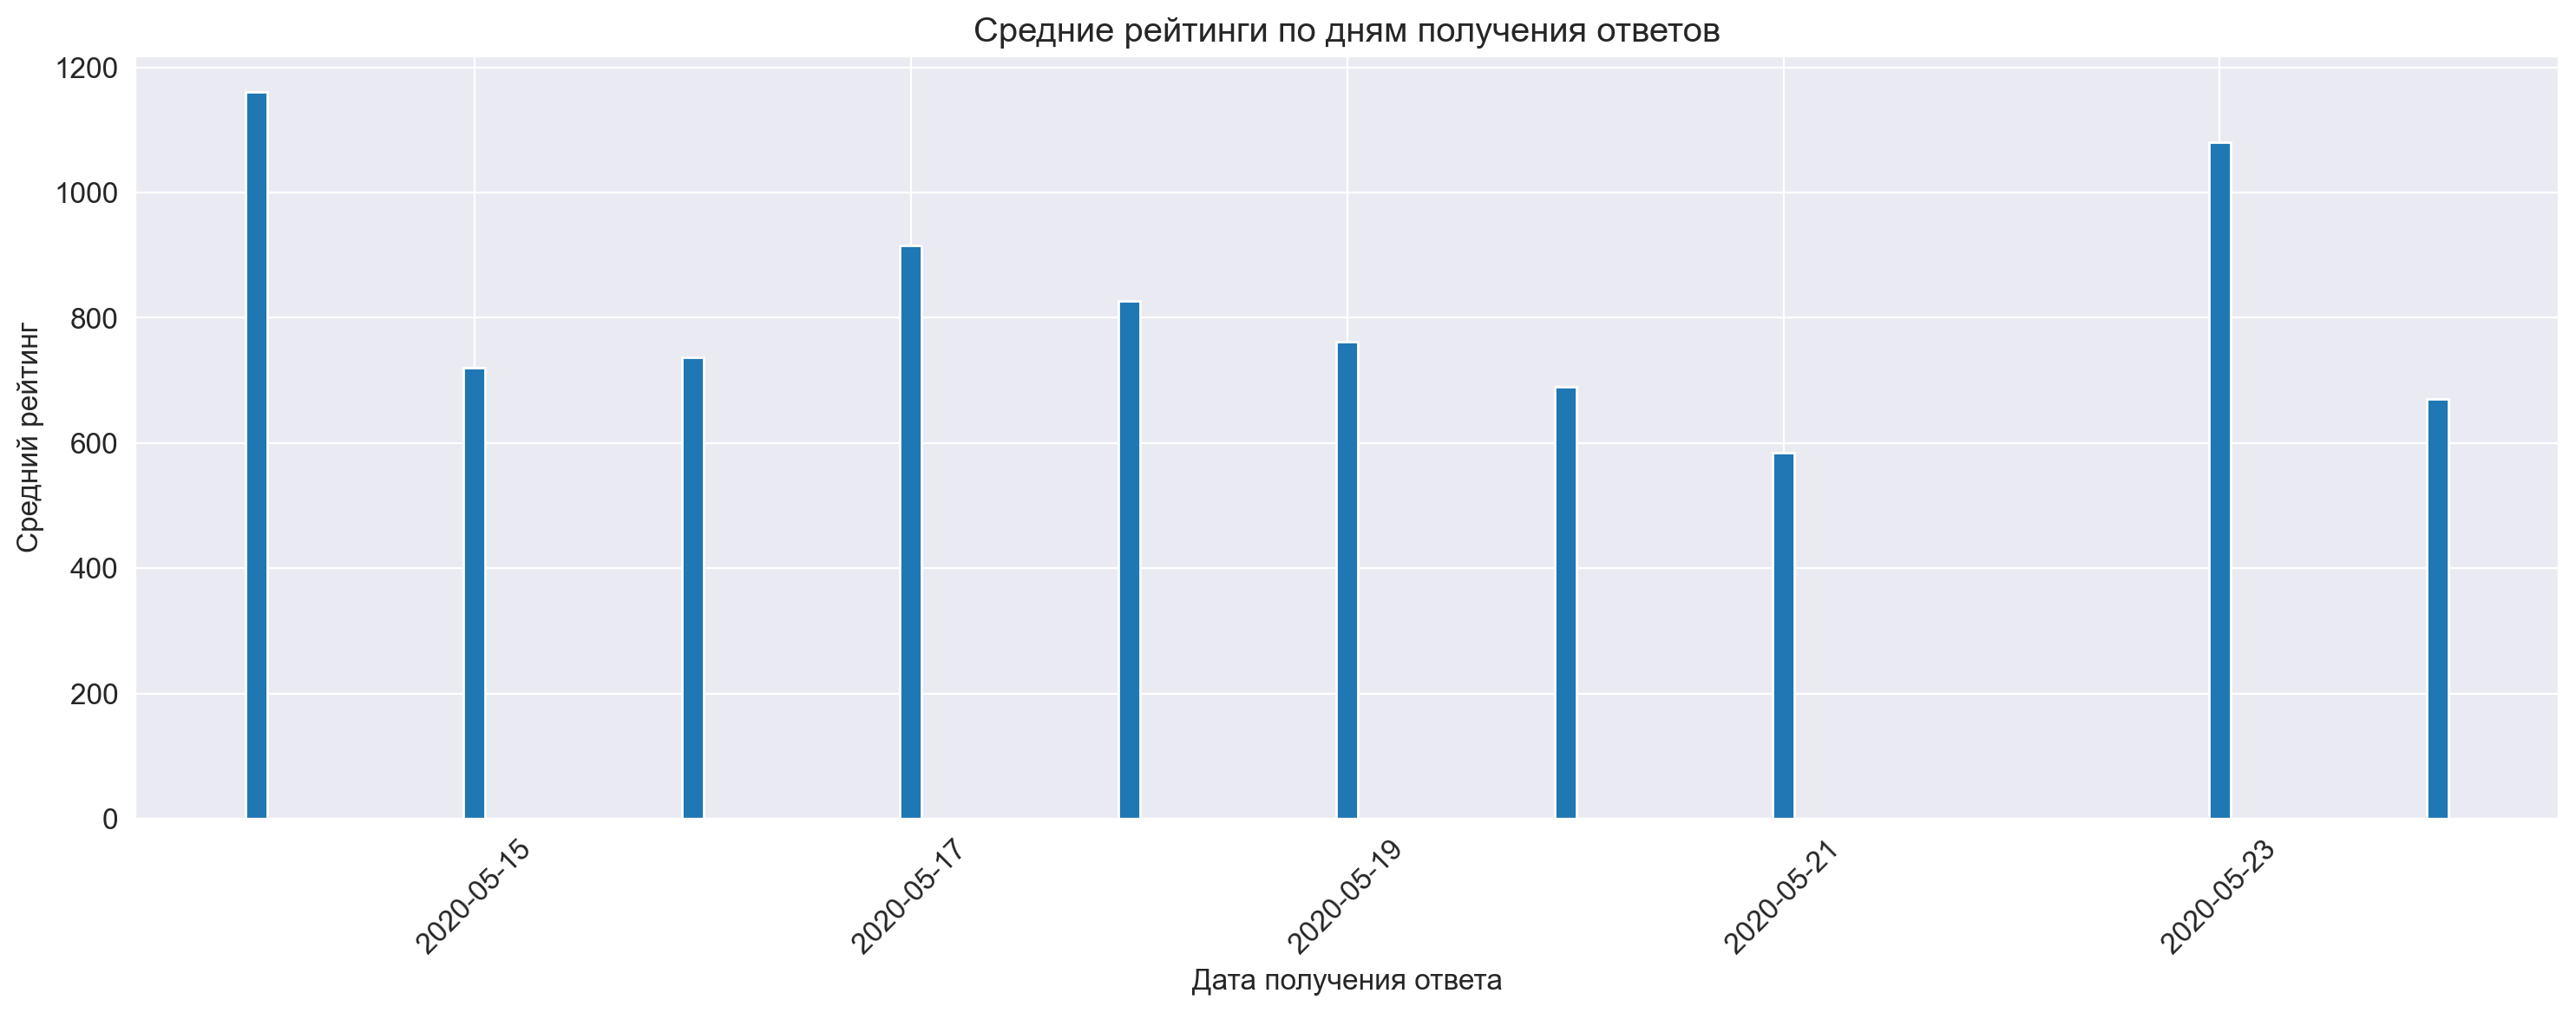

In [21]:

plot_df = df.copy(deep=True)
plot_df['timestamp'] = pd.to_datetime(plot_df['timestamp'])
plot_df['timestamp'] = plot_df['timestamp'].dt.date
mean_ratings_by_day = plot_df.groupby(['timestamp'])['rating'].mean()

plt.figure(figsize=(15, 6))
plt.bar(mean_ratings_by_day.index, mean_ratings_by_day, width=0.1)
plt.title('Средние рейтинги по дням получения ответов')
plt.xlabel('Дата получения ответа')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()
# GPT promt - таблица и услове задания, потом подкорректировал код



Сохраните график в формате pdf (так он останется векторизованным).

In [22]:
plot_df = df.copy(deep=True)
plot_df['timestamp'] = pd.to_datetime(plot_df['timestamp'])
plot_df['timestamp'] = plot_df['timestamp'].dt.date
mean_ratings_by_day = plot_df.groupby(['timestamp'])['rating'].mean()

plt.figure(figsize=(15, 6))
plt.bar(mean_ratings_by_day.index, mean_ratings_by_day, width=0.1)
plt.title('Средние рейтинги по дням получения ответов')
plt.xlabel('Дата получения ответа')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.savefig('Cредние рейтинги по дате отправки.pdf', format='pdf')
plt.close()


### 2. Распределение студентов по курсам.

<span style="color:red">!!!ВНИМАТЕЛЬНО ИЗУЧИТЕ ТЕКСТ НИЖЕ!!!</span>.

<span style="color:orange">Если во время выполнения заданий у вас вознинут вопросы -- еще раз перечитайте текст целиком, скорее всего ответы уже содержатся в нем.</span>

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [23]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [24]:
import numpy as np
df['num_spring_c'] = np.ones(len(df))
df['num_spring_c'][((df['17_group'] == 171) | (df['17_group'] == 172) | (df['17_group'] == 173)) | ((df['18_group'] > 0) & (df['is_mi'] > 0))] = 2
df.head()


C:\Users\rusta\AppData\Local\Temp\ipykernel_1896\4262501917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_spring_c'][((df['17_group'] == 171) | (df['17_group'] == 172) | (df['17_group'] == 173)) | ((df['18_group'] > 0) & (df['is_mi'] > 0))] = 2


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,num_spring_c
223,2020-05-14 20:23:21.662,d555d2805e1d93d4f023e57dc4c8f403,996,0.0,0.0,Безопасность компьютерных систем,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,Компьютерное зрение,Обучение с подкреплением,Проектирование и разработка высоконагруженных ...,Да,0.963768,172.0,DevOps,0.0,2.0
224,2020-05-14 20:47:13.833,253bbe1a2021d0404712a1e4acd22939,1106,0.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Да,0.673913,176.0,DevOps,0.0,1.0
225,2020-05-14 20:52:42.734,881b1a6fda195b354ae2edb396a69f5d,1084,0.0,0.0,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Да,0.782609,172.0,DevOps,0.0,2.0
226,2020-05-14 21:03:02.916,5a9b8ac11ad05b39a58b0e04a263bf4c,1170,0.0,0.0,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Да,0.442029,171.0,DevOps,0.0,2.0
227,2020-05-14 21:10:54.945,1bbbfae51794b83c769b634be8da7b8d,1078,0.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да,0.789855,176.0,DevOps,0.0,1.0


Проверка:

In [25]:
col_name =     'num_spring_c'

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [26]:
# создаю таблицу, где у меня будет храниться название курса и оставшееся для него количество мест
courses = list(df['fall_1'].unique())
courses.extend(list(df[(df['num_spring_c'] == 2)]['fall_2'].unique()))
courses = list(set(courses))
course_space = {'Statistical Learning Theory': 60, 'Высокопроизводительные вычисления': 60, 'Анализ неструктурированных данных': 10000}
df_courses = pd.DataFrame({
    'Course': courses,
    'Free Space': np.ones(len(courses), dtype=int) * 30
})
# пока у человек не попал на курс, на месте курса у него будет стоять 0
df['course_1'] = 0
df['course_2'] = 0
# создаю маску для проведения отбора по студентам
for course in courses:
    combined_mask = pd.concat([
    (df['num_spring_c'] == 1) & (df['fall_1'] == course),
    (df['num_spring_c'] == 2) & (df['fall_1'] == course),
    (df['num_spring_c'] == 2) & (df['fall_2'] == course)
    ], axis=1).any(axis=1)
    # тут GPT помог сделать маску в таком виде, в обычном виде она не работала

    competitors = df[combined_mask]

    if course in course_space.keys():
        n = course_space[course] # делаю ссылку на количество мест в курсе
        df_courses.loc[df_courses['Course'] == course, 'Free Space'] = n # параллельно заполняю таблицу для последующих волн отбора
    # определяю количество мест на курса  
    free_spaces_for_course = df_courses[df_courses['Course'] == course]['Free Space'].iloc[0]
    #определяю победителей
    winners = list(competitors.sort_values(by='percentile').head(free_spaces_for_course)['id'])
    #снижаю количество мест на курсе на количество зачисленных
    df_courses.loc[df_courses['Course'] == course, 'Free Space'] -= len(winners)
    # заполняю название курса, на которое попал студент
    df.loc[(df['id'].isin(winners)) & (df['fall_2'] == course), 'course_2'] = course
    df.loc[(df['id'].isin(winners)) & (df['fall_1'] == course), 'course_1'] = course
# обробатываю челов, у которых после первой волны два одинаковых курса, но в последующем они могут попасть на еще один курс
df.loc[(df['course_1'] == df['course_2']) & (df['fall_2'] != df['fall_3']), 'course_2'] = 0

C:\Users\rusta\AppData\Local\Temp\ipykernel_1896\897302350.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Глубинное обучение в обработке звука' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['id'].isin(winners)) & (df['fall_2'] == course), 'course_2'] = course
C:\Users\rusta\AppData\Local\Temp\ipykernel_1896\897302350.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Глубинное обучение в обработке звука' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['id'].isin(winners)) & (df['fall_1'] == course), 'course_1'] = course


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен 
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [27]:
check_df = pd.read_csv('_2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [28]:

for course in courses:
    if course in course_space.keys():
        n = course_space[course]
    else:
        n = 30
    competitors_1 = df[(df['fall_1'] == course)].sort_values(by='percentile').head(n)
    competitors_2 = df[(df['fall_2'] == course) & (df['num_spring_c'] == 2)].sort_values(by='percentile').head(n)
    combined_competitors = pd.concat([competitors_1, competitors_2], ignore_index=True)
    winners = list(combined_competitors.sort_values(by='percentile').head(n)['id'])
    df.loc[df['id'] == winners[0], 'is_first_place'] = True
    df.loc[df['id'] == winners[-1], 'is_last_place'] = True

check_df_my = df[(df['is_first_place'] == True) | (df['is_last_place'] == True)][['id', 'is_first_place', 'is_last_place']]
check_df = check_df.sort_values(by='timestamp') # сортирую сравниваемый столбец по дате, чтобы было удобнее
# сравниваю таблицы
if check_df[(check_df['is_first_place'] == True) | (check_df['is_last_place'] == True)][['id', 'is_first_place', 'is_last_place']].reset_index(inplace=True) == check_df_my.reset_index(inplace=True):
    print('Проверка пройдена')
else:
    print('Проверка не пройдена, где-то ошибка')


Проверка пройдена


C:\Users\rusta\AppData\Local\Temp\ipykernel_1896\1205692689.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['id'] == winners[0], 'is_first_place'] = True
C:\Users\rusta\AppData\Local\Temp\ipykernel_1896\1205692689.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['id'] == winners[-1], 'is_last_place'] = True


#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

### Второй поток

In [29]:
# аналогично первому потоку, но маска другая
condition_2_mask = ((df['course_1'] == 0) & (df['num_spring_c'] == 1)) | ((df['course_1'] == 0) & (df['num_spring_c'] == 2)) | ((df['course_2'] == 0) & (df['num_spring_c'] == 2))

for course in courses:
    free_spaces_for_course = df_courses[df_courses['Course'] == course]['Free Space'].iloc[0]
    competitors_1 = df.loc[condition_2_mask & (df['fall_2'] == course) & (df['num_spring_c'] == 1)].sort_values(by='percentile').head(free_spaces_for_course)
    competitors_2 = df.loc[condition_2_mask & (df['fall_3'] == course) & (df['num_spring_c'] == 2)].sort_values(by='percentile').head(free_spaces_for_course)
    combined_competitors = pd.concat([competitors_1, competitors_2], ignore_index=True)
    winners = list(set(list(combined_competitors.sort_values(by='percentile').head(free_spaces_for_course)['id'])))
    df_courses.loc[df_courses['Course'] == course, 'Free Space'] -= len(winners)
    df.loc[(df['id'].isin(winners)) & (df['course_1'] != 0), 'course_2'] = course
    df.loc[(df['id'].isin(winners)) & (df['course_1'] == 0), 'course_1'] = course

### Третий поток

In [30]:
#аналогично
condition_3_mask = ((df['course_1'] == 0) & (df['num_spring_c'] == 1))

for course in courses:
    free_spaces_for_course = df_courses[df_courses['Course'] == course]['Free Space'].iloc[0]
    competitors_1 = df.loc[condition_3_mask & (df['fall_3'] == course) & (df['num_spring_c'] == 1)].sort_values(by='percentile').head(free_spaces_for_course)
    combined_competitors = competitors_1
    winners = list(set(list(combined_competitors.sort_values(by='percentile').head(free_spaces_for_course)['id'])))
    df_courses.loc[df_courses['Course'] == course, 'Free Space'] -= len(winners)
    df.loc[(df['id'].isin(winners)) & (df['fall_3'] == course) & (df['num_spring_c'] == 1), 'course_1'] = course
# обробатываю людей, которые дважды попали на один и тот же курс по итогу трех вол
df.loc[df['course_1'] == df['course_2'], 'course_2'] = '???'

In [31]:
# заменяю пропуски после трех потоков отбора
df.loc[df['num_spring_c'] == 1, 'course_2'] = '-'
df.loc[(df['num_spring_c'] == 1) & (df['course_1'] == 0), 'course_1'] = '???'
df.loc[df['course_1'] == 0, 'course_1'] = '???'
df.loc[df['course_2'] == 0, 'course_2'] = '???'
#формирую финальную таблицу
res_fall_df = df[['id', 'course_1', 'course_2']]
res_fall_df = res_fall_df.rename(columns={'id': 'ID', 'course_1':'course1', 'course_2':'course2'})
res_fall_df.to_csv('res_fall.csv', index=None)
res_fall_df.head()

,ID,course1,course2
223,d555d2805e1d93d4f023e57dc4c8f403,Байесовские методы машинного обучения,Глубинное обучение в обработке звука
224,253bbe1a2021d0404712a1e4acd22939,Statistical Learning Theory,-
225,881b1a6fda195b354ae2edb396a69f5d,Глубинное обучение в обработке звука,Анализ неструктурированных данных
226,5a9b8ac11ad05b39a58b0e04a263bf4c,Глубинное обучение в обработке звука,Statistical Learning Theory
227,1bbbfae51794b83c769b634be8da7b8d,Анализ неструктурированных данных,-


**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/52663/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

Успешная посылка: https://contest.yandex.ru/contest/52663/run-report/91730323/

Никнейм: Рустам Сокуров

*Дисклеймер:*

Успешная посылка в контесте является **обязательным** условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего. 

При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем. 

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/52663/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания:
![Alt text](image.png)

In [32]:
ML_STUDENT_MASK = df['is_ml_student'] == 1
ML2_COURSE_NAME = 'Машинное обучение 2'

# Сдвиг приоритетов для студентов, которые выбрали "Машинное обучение-2" в spring_1
shift_mask = ML_STUDENT_MASK & (df['spring_1'] == ML2_COURSE_NAME)
df.loc[shift_mask, 'spring_1'] = df.loc[shift_mask, 'spring_2']
df.loc[shift_mask, 'spring_2'] = df.loc[shift_mask, 'spring_3']
df.loc[shift_mask, 'spring_3'] = np.nan

# Сдвиг приоритетов для студентов, которые выбрали "Машинное обучение-2" в spring_2
shift_mask = ML_STUDENT_MASK & (df['spring_2'] == ML2_COURSE_NAME)
df.loc[shift_mask, 'spring_2'] = df.loc[shift_mask, 'spring_3']
df.loc[shift_mask, 'spring_3'] = np.nan

# Удаление "Машинное обучение-2" из spring_3 для студентов МИ
df.loc[ML_STUDENT_MASK & (df['spring_3'] == ML2_COURSE_NAME), 'spring_3'] = np.nan

# Продолжайте ваш процесс отбора...
# код почти полностью написал GPT. Промт: https://pastebin.com/h7hFhe28

In [33]:
df['num_spring_c'] = np.ones(len(df))
df['num_spring_c'][((df['17_group'] == 171) | (df['17_group'] == 172) | (df['17_group'] == 173))] = 2


C:\Users\rusta\AppData\Local\Temp\ipykernel_1896\1879744413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_spring_c'][((df['17_group'] == 171) | (df['17_group'] == 172) | (df['17_group'] == 173))] = 2


### Первая волна

In [34]:

# создаю таблицу, где у меня будет храниться название курса и оставшееся для него количество мест
courses = list(df['spring_1'].unique())
courses.extend(list(df[(df['num_spring_c'] == 2)]['spring_2'].unique()))
courses.extend(list(df[(df['num_spring_c'] == 2)]['spring_3'].unique()))
courses = list(set(courses))
df_courses = pd.DataFrame({
    'Course': courses,
    'Free Space': np.ones(len(courses), dtype=int) * 30
})
# пока у человек не попал на курс, на месте курса у него будет стоять 0
df['course_1'] = 0
df['course_2'] = 0
course_space = {'Обучение с подкреплением': 60, 'Анализ данных в бизнесе': 60}
# создаю маску для проведения отбора по студентам
for course in courses:
    combined_mask = pd.concat([
    (df['num_spring_c'] == 1) & (df['spring_1'] == course),
    (df['num_spring_c'] == 2) & (df['spring_1'] == course),
    (df['num_spring_c'] == 2) & (df['spring_2'] == course)
    ], axis=1).any(axis=1)

    competitors = df[combined_mask]

    if course in course_space.keys():
        n = course_space[course] # делаю ссылку на количество мест в курсе
        print(f"Updating course: {course} to {n} seats")  # Add this print
        df_courses.loc[df_courses['Course'] == course, 'Free Space'] = n # параллельно заполняю таблицу для последующих волн отбора
    # определяю количество мест на курса  
    free_spaces_for_course = df_courses[df_courses['Course'] == course]['Free Space'].iloc[0]
    #определяю победителей
    winners = list(competitors.sort_values(by='percentile').head(free_spaces_for_course)['id'])
    #снижаю количество мест на курсе на количество зачисленных
    df_courses.loc[df_courses['Course'] == course, 'Free Space'] -= len(winners)
    # заполняю название курса, на которое попал студент
    df.loc[(df['id'].isin(winners)) & (df['spring_2'] == course), 'course_2'] = course
    df.loc[(df['id'].isin(winners)) & (df['spring_1'] == course), 'course_1'] = course
# обробатываю челов, у которых после первой волны два одинаковых курса
df.loc[(df['course_1'] == df['course_2']) & (df['spring_2'] != df['spring_3']), 'course_2'] = 0

Updating course: Анализ данных в бизнесе to 60 seats
Updating course: Обучение с подкреплением to 60 seats


C:\Users\rusta\AppData\Local\Temp\ipykernel_1896\3943962935.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Компьютерное зрение' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['id'].isin(winners)) & (df['spring_2'] == course), 'course_2'] = course
C:\Users\rusta\AppData\Local\Temp\ipykernel_1896\3943962935.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Компьютерное зрение' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['id'].isin(winners)) & (df['spring_1'] == course), 'course_1'] = course


### Вторая волна

In [35]:
condition_2_mask = ((df['course_1'] == 0) & (df['num_spring_c'] == 1)) | ((df['course_1'] == 0) & (df['num_spring_c'] == 2)) | ((df['course_2'] == 0) & (df['num_spring_c'] == 2))

for course in courses:
    free_spaces_for_course = df_courses[df_courses['Course'] == course]['Free Space'].iloc[0]
    competitors_1 = df.loc[condition_2_mask & (df['spring_2'] == course) & (df['num_spring_c'] == 1)].sort_values(by='percentile').head(free_spaces_for_course)
    competitors_2 = df.loc[condition_2_mask & (df['spring_3'] == course) & (df['num_spring_c'] == 2)].sort_values(by='percentile').head(free_spaces_for_course)
    combined_competitors = pd.concat([competitors_1, competitors_2], ignore_index=True)
    winners = list(set(list(combined_competitors.sort_values(by='percentile').head(free_spaces_for_course)['id'])))
    df_courses.loc[df_courses['Course'] == course, 'Free Space'] -= len(winners)
    df.loc[(df['id'].isin(winners)) & (df['course_1'] != 0), 'course_2'] = course
    df.loc[(df['id'].isin(winners)) & (df['course_1'] == 0), 'course_1'] = course

### Третья волна

In [36]:
condition_3_mask = ((df['course_1'] == 0) & (df['num_spring_c'] == 1))

for course in courses:
    free_spaces_for_course = df_courses[df_courses['Course'] == course]['Free Space'].iloc[0]
    competitors_1 = df.loc[condition_3_mask & (df['spring_3'] == course) & (df['num_spring_c'] == 1)].sort_values(by='percentile').head(free_spaces_for_course)
    combined_competitors = competitors_1
    winners = list(set(list(combined_competitors.sort_values(by='percentile').head(free_spaces_for_course)['id'])))
    df_courses.loc[df_courses['Course'] == course, 'Free Space'] -= len(winners)
    df.loc[(df['id'].isin(winners)) & (df['spring_3'] == course) & (df['num_spring_c'] == 1), 'course_1'] = course
# обробатываю людей, которые дважды попали на один и тот же курс по итогу трех волн
df.loc[df['course_1'] == df['course_2'], 'course_2'] = '???'

### Сохранение

In [37]:
df.loc[df['num_spring_c'] == 1, 'course_2'] = '-'
df.loc[(df['num_spring_c'] == 1) & (df['course_1'] == 0), 'course_1'] = '???'
df.loc[df['course_1'] == 0, 'course_1'] = '???'
df.loc[df['course_2'] == 0, 'course_2'] = '???'

res_fall_df = df[['id', 'course_1', 'course_2']]
res_fall_df = res_fall_df.rename(columns={'id': 'ID', 'course_1':'course1', 'course_2':'course2'})
res_fall_df.to_csv('res_spring.csv', index=None)

Ссылка на удачную попытку: https://contest.yandex.ru/contest/52663/run-report/91768913/